# Statistically, what would be the best Pokemon team Ash could assemble?

Members: Sathvik Inteti, Arnav Mittal, Daneil Nguyen

## Introduction

Pokemon is a famous video game series that has beloved fans both old and young. It revolves around "trainers" catching these creatures called Pokemon and using them in battles against others. It has become an international sensation and has spawned a multitude of other forms of entertainment such as a trading card game, movies, and an anime show. Most notably, many fans know of 10 year old Ash Ketchum, the protagonist of the Pokemon anime. The anime follows Ash and his friends on his journey to become a Pokemon Champion, the best Pokemon trainer of them all.

The Pokemon anime has been on air for more than 20 years and Ash has not aged one single bit (because of cartoon logic). Additionally, he has yet to become a Pokemon Champion despite the amount of time he has trained and the number of Pokemon he has encountered, until recently. In 2019, after 22 years after the initial release of the show, Ash's dream came into fruition as he has conquered the Alola league and was crowned as a Pokemon Champion ([source](https://www.pokemonfanclub.net/did-ash-become-a-pokemon-master/#:~:text=Pokemons%20Ash%20Finally%20Becomes%20A,master%20for%20the%20first%20time.)). 

Here, a question arises that we would like to explore. Ash has had 22 years of experience and has accumulated a grand roster over this time. What is the best Pokemon team that Ash could assemble in terms of strength?

In our case, "strength" is determined by total stats of a Pokemon and how a specific Pokemon's type fairs with others (i.e. what types are they weak to and strong against). There are other factors that come into play such as abilities, the moves that Pokemon can use, etc. but that adds an extra level of complexity that we cannot fully analyze the affect that they will have in combat.

To test how "strong" our team is, we will face it against Ash's original rival in the Pokemon anime and video game: Gary Oak. We will be using Gary's lineup in which he chose Squirtle as his starter Pokemon as for the most part many players of the Pokemon game chose to obtain Charmander (the rival will always pick the Pokemon that has a type advantage against yours).

We will be utilizing various data sets that contain information about the stats of various Pokemon along with combat data in which we will feed to a learning model to predict the winner of this grand battle between Pokemon champions. 






Link to datasets used:

Pokemon Stats Data: https://www.kaggle.com/datasets/mariotormo/complete-pokemon-dataset-updated-090420?select=pokedex_%28Update.04.20%29.csv

Pokemon Combat Data: https://www.kaggle.com/datasets/terminus7/pokemon-challenge?select=tests.csv

Ash Pokemon Data: https://www.epicdope.com/all-of-ashs-pokemon-in-the-anime/

Gary Pokemon Data: https://pokemon.fandom.com/wiki/Blue%27s_Pok%C3%A9mon_Teams_(Red/Green/Blue)#Charmander


## Data Wrangling

To get started, we will need to clean up the datasets that we will be using by extracting only the relevant columns along with rows of Pokemon. For Ash and Gary, we will store information about the Pokemon that they have and with Ash we will do further scraping to get the best lineup he can use against Gary. 

In [244]:
#import all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [245]:
#import pokemon data from csv and filter by necessary columns
all_pokemon = pd.read_csv('data/pokedex_(Update.04.20).csv')
all_pokemon = all_pokemon[['pokedex_number', 'name', 'type_1', 'type_2', 'total_points', 'against_normal', 'against_fire', 'against_water', 'against_electric', 'against_grass', 'against_ice', 'against_fight', 'against_poison', 'against_ground', 'against_flying', 'against_psychic', 'against_bug', 'against_rock', 'against_ghost', 'against_dragon', 'against_dark', 'against_steel', 'against_fairy']]
all_pokemon = all_pokemon.set_axis(['pokedex_number', 'name', 'type_1', 'type_2', 'total_points', 'Normal', 'Fire', 'Water', 'Electric', 'Grass', 'Ice', 'Fight', 'Poison', 'Ground', 'Flying', 'Psychic', 'Bug', 'Rock', 'Ghost', 'Dragon', 'Dark', 'Steel', 'Fairy'], axis=1, inplace=False)
all_pokemon.head()

,pokedex_number,name,type_1,type_2,total_points,Normal,Fire,Water,Electric,Grass,...,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
0,1,Bulbasaur,Grass,Poison,318.0,1.0,2.0,0.5,0.5,0.25,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,Grass,Poison,405.0,1.0,2.0,0.5,0.5,0.25,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,Grass,Poison,525.0,1.0,2.0,0.5,0.5,0.25,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,Grass,Poison,625.0,1.0,1.0,0.5,0.5,0.25,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,Fire,NaN,309.0,1.0,0.5,2.0,1.0,0.50,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


As seen in the sample data shown above, the data that we will be using include the Pokedex number (i.e. an index of the Pokemon), their name, types, total stat, and their type match up against all the other types. For instance, if a Pokemon has a 2.0 value under the "Grass" column, it means that it is 2x weak against Pokemon that have a grass type.

In [246]:
#get Gary's list of Pokemon and retrieve data on each
gary_data = pd.read_csv('data/Gary_pokemon.csv')
gary_pokemon = pd.DataFrame()
for i, row in gary_data.iterrows():
    gary_pokemon = pd.concat([gary_pokemon, all_pokemon[all_pokemon['name'] == row['Name']]])
gary_pokemon

,pokedex_number,name,type_1,type_2,total_points,Normal,Fire,Water,Electric,Grass,...,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
22,18,Pidgeot,Normal,Flying,479.0,1.0,1.0,1.0,2.0,0.5,...,0.0,1.0,1.0,0.5,2.0,0.0,1.0,1.0,1.0,1.0
83,65,Alakazam,Psychic,NaN,500.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.5,2.0,1.0,2.0,1.0,2.0,1.0,1.0
144,112,Rhydon,Ground,Rock,485.0,0.5,0.5,4.0,0.0,4.0,...,2.0,0.5,1.0,1.0,0.5,1.0,1.0,1.0,2.0,1.0
77,59,Arcanine,Fire,NaN,555.0,1.0,0.5,2.0,1.0,0.5,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
132,103,Exeggutor,Grass,Psychic,530.0,1.0,2.0,0.5,0.5,0.5,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
11,9,Blastoise,Water,NaN,530.0,1.0,0.5,0.5,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0


In [247]:
#get Ash's list of Pokemon and retrieve data on each
ash_data = pd.read_csv('data/Ash_pokemon.csv')
ash_pokemon = pd.DataFrame()
for i, row in ash_data.iterrows():
    ash_pokemon = pd.concat([ash_pokemon, all_pokemon[all_pokemon['pokedex_number'] == row['Pokedex Number']]])

#dropping duplicates is needed as many Pokemon may have different special forms and we only want the base form
ash_pokemon = ash_pokemon.drop_duplicates('pokedex_number')
ash_pokemon

,pokedex_number,name,type_1,type_2,total_points,Normal,Fire,Water,Electric,Grass,...,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
193,153,Bayleef,Grass,NaN,405.0,1.0,2.00,0.5,0.5,0.50,...,0.50,2.0,1.0,2.00,1.00,1.0,1.0,1.00,1.0,1.0
616,525,Boldore,Rock,NaN,390.0,0.5,0.50,2.0,1.0,2.00,...,2.00,0.5,1.0,1.00,1.00,1.0,1.0,1.00,2.0,1.0
497,418,Buizel,Water,NaN,330.0,1.0,0.50,0.5,2.0,2.00,...,1.00,1.0,1.0,1.00,1.00,1.0,1.0,1.00,0.5,1.0
0,1,Bulbasaur,Grass,Poison,318.0,1.0,2.00,0.5,0.5,0.25,...,1.00,2.0,2.0,1.00,1.00,1.0,1.0,1.00,1.0,0.5
15,12,Butterfree,Bug,Flying,395.0,1.0,2.00,1.0,2.0,0.25,...,0.00,2.0,1.0,0.50,4.00,1.0,1.0,1.00,1.0,1.0
6,6,Charizard,Fire,Flying,534.0,1.0,0.50,2.0,2.0,0.25,...,0.00,1.0,1.0,0.25,4.00,1.0,1.0,1.00,0.5,0.5
402,341,Corphish,Water,NaN,308.0,1.0,0.50,0.5,2.0,2.00,...,1.00,1.0,1.0,1.00,1.00,1.0,1.0,1.00,0.5,1.0
278,232,Donphan,Ground,NaN,500.0,1.0,1.00,2.0,0.0,2.00,...,1.00,1.0,1.0,1.00,0.50,1.0,1.0,1.00,1.0,1.0
1016,882,Dracovish,Water,Dragon,505.0,1.0,0.25,0.0,1.0,1.00,...,1.00,1.0,1.0,1.00,1.00,1.0,2.0,1.00,0.5,2.0
187,149,Dragonite,Dragon,Flying,600.0,1.0,0.50,0.5,1.0,0.25,...,0.00,1.0,1.0,0.50,2.00,1.0,2.0,1.00,1.0,2.0


Now we have filtered and obtained data for all of Ash and Gary's Pokemon. As it can be seen from the above, Ash has garnered a good amount of Pokemon through the years and it is now time to see which are the best to use in battle with Gary. 

We will need to see what the average stat distribution of Gary's Pokemon are and by doing so we can further filter down which of Ash's Pokemon can be utilized in combat.

In [248]:
gary_avg_total_stat = gary_pokemon['total_points'].mean()
print(gary_avg_total_stat)

513.1666666666666


Now that we have the average total stat points of Gary's Pokemon, we would ideally want to have all Pokemons that would be placed on Ash's team to have an equal or higher total stat point.

In [249]:
ash_pokemon_stat_filtered = ash_pokemon[ash_pokemon['total_points'] >= gary_avg_total_stat].sort_values(['total_points'], ascending=False)
ash_pokemon_stat_filtered

,pokedex_number,name,type_1,type_2,total_points,Normal,Fire,Water,Electric,Grass,...,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
187,149,Dragonite,Dragon,Flying,600.0,1.0,0.5,0.5,1.0,0.25,...,0.0,1.0,1.0,0.50,2.00,1.0,2.0,1.0,1.0,2.0
815,706,Goodra,Dragon,NaN,600.0,1.0,0.5,0.5,0.5,0.00,...,1.0,1.0,1.0,1.00,1.00,1.0,2.0,1.0,1.0,2.0
939,809,Melmetal,Steel,NaN,600.0,0.5,2.0,1.0,1.0,0.50,...,2.0,0.5,0.5,0.50,0.50,1.0,0.5,1.0,0.5,0.5
934,804,Naganadel,Poison,Dragon,540.0,1.0,0.5,0.5,0.5,0.25,...,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0
181,143,Snorlax,Normal,NaN,540.0,1.0,1.0,1.0,1.0,1.00,...,1.0,1.0,1.0,1.00,1.00,0.0,1.0,1.0,1.0,1.0
167,131,Lapras,Water,Ice,535.0,1.0,1.0,0.0,2.0,2.00,...,1.0,1.0,1.0,1.00,2.00,1.0,1.0,1.0,1.0,1.0
830,715,Noivern,Flying,Dragon,535.0,1.0,0.5,0.5,1.0,0.25,...,0.0,1.0,1.0,0.50,2.00,1.0,2.0,1.0,1.0,2.0
6,6,Charizard,Fire,Flying,534.0,1.0,0.5,2.0,2.0,0.25,...,0.0,1.0,1.0,0.25,4.00,1.0,1.0,1.0,0.5,0.5
469,392,Infernape,Fire,Fighting,534.0,1.0,0.5,2.0,1.0,0.50,...,2.0,2.0,2.0,0.25,1.00,1.0,1.0,0.5,0.5,1.0
764,658,Greninja,Water,Dark,530.0,1.0,0.5,0.5,2.0,2.00,...,1.0,1.0,0.0,2.00,1.00,0.5,1.0,0.5,0.5,2.0


We can now further filter down Ash's Pokemon by seeing which Pokemon have a type advantage against Gary's Pokemon. First, we need to see what Gary's Pokemon are weak to and the count of Pokemon that are weak to each type. We will do this for types that Gary's Pokemon have a 2x and 4x weakness against. 

In [250]:
np_gary = gary_pokemon.to_numpy()

# this will be storing the type weakness and the count of Pokemon that it applies to
# a Pokemon can have either a 2x or 4x weakness against any particular type
weakness_2_count = {}
weakness_4_count = {}

cols = gary_pokemon.columns.values.tolist()

for i in np_gary:
    #goes through all the columns and compare type matchup
    for j in range (5, len(i)):
        if (i[j] == 2):
            if cols[j] in weakness_2_count.keys():
                cur_count = weakness_2_count[cols[j]] + 1
                weakness_2_count[cols[j]] = cur_count
            else: 
                weakness_2_count[cols[j]] = 1

        elif (i[j] == 4):
            if cols[j] in weakness_4_count.keys():
                cur_count = weakness_4_count[cols[j]] + 1
                weakness_4_count[cols[j]] = cur_count
            else: 
                weakness_4_count[cols[j]] = 1

print(weakness_4_count)
print(weakness_2_count)


{'Water': 1, 'Grass': 1, 'Bug': 1}
{'Electric': 2, 'Ice': 3, 'Rock': 2, 'Bug': 1, 'Ghost': 2, 'Dark': 2, 'Fight': 1, 'Ground': 2, 'Steel': 1, 'Water': 1, 'Fire': 1, 'Poison': 1, 'Flying': 1, 'Grass': 1}


Now we have obtained all the various types that Gary's team is weak against. However, there are still a good handful of types that only have 1 Pokemon that fall under that type weakness category. To further filter down the Pokemon Ash should use, we will only look for Pokemon whose types is effective against 2 or more of Gary's Pokemon. 

In [251]:
#get a list of all suitable types to be used in battle
types = list(weakness_4_count.keys())
for idx, i in enumerate(weakness_2_count):
    #only want type if at least 2 Pokemon are weak to it
    if weakness_2_count[i] >= 2:
        types.append(i)

#filter Ash's Pokemon based on the typing 
ash_pokemon_type_filtered = ash_pokemon_stat_filtered[ash_pokemon_stat_filtered['type_1'].isin(types) | ash_pokemon_stat_filtered['type_2'].isin(types) ]
ash_pokemon_type_filtered


,pokedex_number,name,type_1,type_2,total_points,Normal,Fire,Water,Electric,Grass,...,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
167,131,Lapras,Water,Ice,535.0,1.0,1.0,0.0,2.0,2.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
764,658,Greninja,Water,Dark,530.0,1.0,0.5,0.5,2.0,2.0,...,1.0,1.0,0.0,2.0,1.0,0.5,1.0,0.5,0.5,2.0
846,727,Incineroar,Fire,Dark,530.0,1.0,0.5,2.0,1.0,0.5,...,2.0,1.0,0.0,1.0,2.0,0.5,1.0,0.5,0.5,1.0
301,254,Sceptile,Grass,NaN,530.0,1.0,2.0,0.5,0.5,0.5,...,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
466,389,Torterra,Grass,Ground,525.0,1.0,2.0,1.0,0.0,1.0,...,0.5,2.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0
646,553,Krookodile,Ground,Dark,519.0,1.0,1.0,2.0,0.0,2.0,...,1.0,1.0,0.0,2.0,0.5,0.5,1.0,0.5,1.0,2.0


Now we have a list of Ash's Pokemon that are filtered by total stat points and types. Fortunately for us, 6 Pokemon resulted from our data wrangling process and that is the exact number of slots available on a Pokemon team. 

However, in the case that there were more than 6 Pokemon that resulted from our type filtering, we would look at Pokemons that have the same or similar typing and choose the one with the higher total stat points. In the case that less than 6 Pokemon were chosen, we would look back into the list of Pokemon that were in the stat filtered list and choose from the top of the list given that they are weak to less than half of Gary's Pokemon in terms of their typing.

## Data Exploration and Analysis

Now that we have the Pokemon team lineups for both Ash and Gary, we will compare how these teams stack up against each other along with how Ash's chosen team compares to the entirety of his Pokemon roster. 

Ash's Team Summary Statisics
count      6.000000
mean     528.166667
std        5.492419
min      519.000000
25%      526.250000
50%      530.000000
75%      530.000000
max      535.000000
Name: total_points, dtype: float64

All Ash's Pokemon Summary Statisics
count     54.000000
mean     458.500000
std       85.943323
min      300.000000
25%      397.500000
50%      487.500000
75%      523.500000
max      600.000000
Name: total_points, dtype: float64

Gary's Final Team Summary Statisics
count      6.000000
mean     513.166667
std       29.835661
min      479.000000
25%      488.750000
50%      515.000000
75%      530.000000
max      555.000000
Name: total_points, dtype: float64



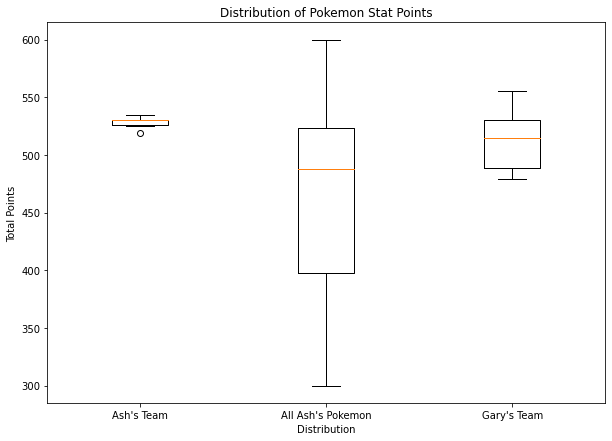

In [252]:
#box plot of final teams of Gary's and Ash based on stats 
ash_total_points = ash_pokemon_type_filtered['total_points']
ash_all_total_points = ash_pokemon['total_points']
gary_total_points = gary_pokemon['total_points']

print("Ash's Team Summary Statisics")
print(ash_total_points.describe())
print()

print("All Ash's Pokemon Summary Statisics")
print(ash_all_total_points.describe())
print()

print("Gary's Final Team Summary Statisics")
print(gary_total_points.describe())
print()

plt.figure(figsize = (10, 7))
plt.boxplot([ash_total_points, ash_all_total_points, gary_total_points])
plt.xticks([1, 2, 3], ["Ash's Team", "All Ash's Pokemon", "Gary's Team"])
plt.title("Distribution of Pokemon Stat Points")
plt.xlabel('Distribution')
plt.ylabel('Total Points')
plt.show()

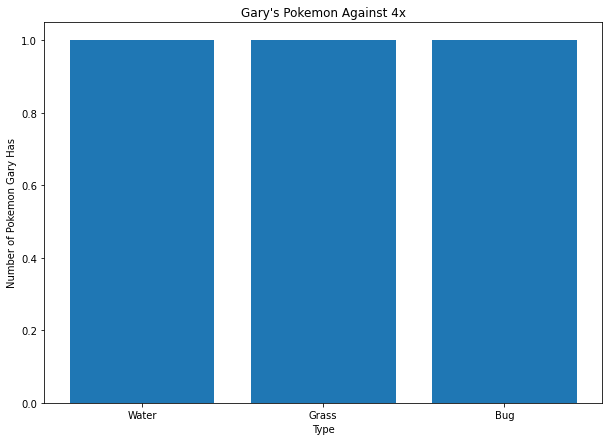

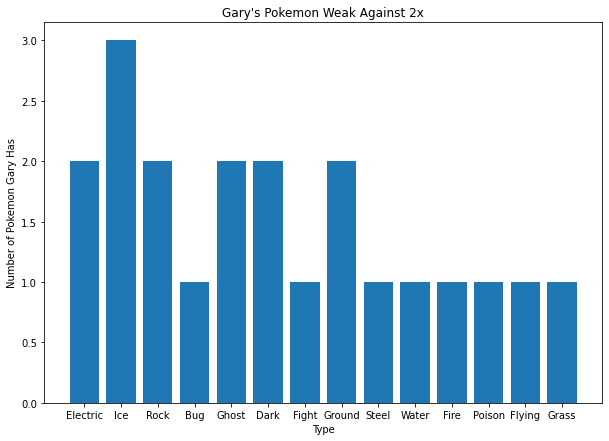

In [253]:
plt.figure(figsize = (10, 7))
plt.bar(weakness_4_count.keys(), weakness_4_count.values())
plt.title("Number of Gary's Pokemon that are 4x Weak Against")
plt.xlabel('Type')
plt.ylabel('Number of Pokemon Gary Has')
plt.show()

plt.figure(figsize = (10, 7))
plt.bar(weakness_2_count.keys(), weakness_2_count.values())
plt.title("Number of Gary's Pokemon that are 2x Weak Against")
plt.xlabel('Type')
plt.ylabel('Number of Pokemon Gary Has')
plt.show()

In [254]:
combats_df = pd.read_csv("data/combats.csv")
combats_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [255]:
#split into training and testing model





## Conclusion

Pokemon has grown to be a complex game with many battle mechanics that we were not able to show fully in the above data analysis. However, we can clearly see the importance of stats and typing when it comes to gauging the best team suited for a particular battle. 